In [33]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as ts
import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D,BatchNormalization
from sklearn.metrics import confusion_matrix, classification_report


In [34]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


In [35]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
 
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
model = keras.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', 
kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', 
kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', 
metrics=['accuracy'])
plot_model(model, to_file='fmnistcnn.png',show_shapes=True, 
show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [36]:
history = model.fit(X_train, y_train, epochs=15, batch_size=32)


Epoch 1/15
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3715 - accuracy: 0.8681
Epoch 2/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2480 - accuracy: 0.9103
Epoch 3/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2036 - accuracy: 0.9247
Epoch 4/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1715 - accuracy: 0.9369
Epoch 5/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1450 - accuracy: 0.94630s - loss: 0.1448 - accuracy: 0.
Epoch 6/15
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1236 - accuracy: 0.9546
Epoch 7/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1061 - accuracy: 0.9603
Epoch 8/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0877 - accuracy: 0.9669
Epoch 9/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0759 - accuracy: 0.9723
Epoch 10/15
1875/1875 [=========

In [37]:
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Train accuracy:", round(train_acc, 5))
print("Train loss:", round(train_loss, ))
print("Test accuracy:", round(test_acc, 5))
print("Test loss:", round(test_loss, 3))


313/313 [==============================] - 2s 5ms/step - loss: 0.4204 - accuracy: 0.9182
Train accuracy: 0.9948
Train loss: 0
Test accuracy: 0.9182
Test loss: 0.42


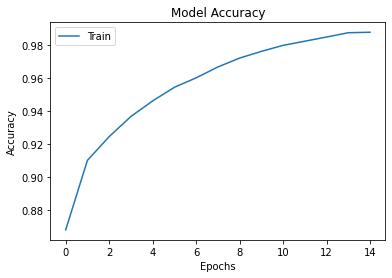

In [38]:
plt.plot(history.history["accuracy"])
#plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()